<a href="https://colab.research.google.com/github/Praveen21-06/DL-LAB-WORK/blob/main/DL_LAB_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PART 1 — Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

PART 2 — Load and Clean Dataset

In [4]:
df = pd.read_csv("spam_or_not_spam.csv")
df.dropna(subset=['email'], inplace=True)
df['email'] = df['email'].astype(str)
emails = df['email']
labels = df['label']
print(f"Dataset loaded. Shape: {df.shape}")

Dataset loaded. Shape: (2999, 2)


PART 3 — Train-Test Split

In [5]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    emails, labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)
print(f"Training samples: {len(X_train_raw)}")
print(f"Testing samples: {len(X_test_raw)}")

Training samples: 2399
Testing samples: 600


PART 4 — Vectorisation (TF-IDF)

In [6]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train = tfidf.fit_transform(X_train_raw).toarray()
X_test = tfidf.transform(X_test_raw).toarray()
print(f"Feature Matrix Shape: {X_train.shape}")

Feature Matrix Shape: (2399, 5000)


PART 5 — Model Architecture

In [7]:
learning_rate = 0.0005
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
optimizer = Adam(learning_rate=learning_rate)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 648,449 (2.47 MB)

 Trainable params: 648,449 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

PART 6 — Model Training

In [8]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=1
)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7479 - loss: 0.6434 - val_accuracy: 0.8333 - val_loss: 0.3931
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8469 - loss: 0.3197 - val_accuracy: 0.9458 - val_loss: 0.1865
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9711 - loss: 0.1264 - val_accuracy: 0.9750 - val_loss: 0.0755
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9927 - loss: 0.0377 - val_accuracy: 0.9875 - val_loss: 0.0525
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9959 - loss: 0.0186 - val_accuracy: 0.9875 - val_loss: 0.0434
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9967 - loss: 0.0144 - val_accuracy: 0.9875 - val_loss: 0.0460
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9992 - loss: 0.0073 - val_accuracy: 0.9875 - val_loss: 0.0477
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9985 - loss: 0.0046 - val_accuracy: 0.9875 - v

PART 7 — Evaluation and Visualization

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Test Accuracy: 0.995

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       500
           1       1.00      0.97      0.98       100

    accuracy                           0.99       600
   macro avg       1.00      0.98      0.99       600
weighted avg       1.00      0.99      0.99       600



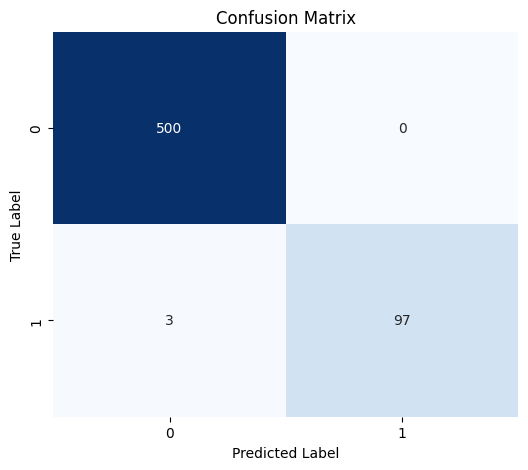

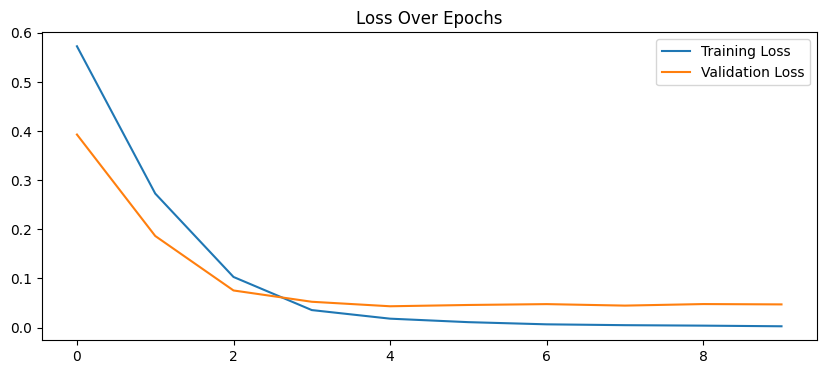

In [9]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()